In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import pydot
import graphviz
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from ipywidgets import interactive
from graphviz import Source
from IPython.display import SVG,display


from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Questão 1

## Processamento dos dados

In [ ]:
data_train = pd.read_csv("train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### tratando o conjunto de dados

In [ ]:

# dropando as colunas que não são relevantes
data_train = data_train.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'])
data_train = data_train.dropna() #dropando os NA

In [ ]:
# tratando os dados nominais
data_train[["Sex"]] = data_train[["Sex"]].replace('male',1).replace('female', 0)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
885,0,3,0,39.0,0,5
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
889,1,1,1,26.0,0,0


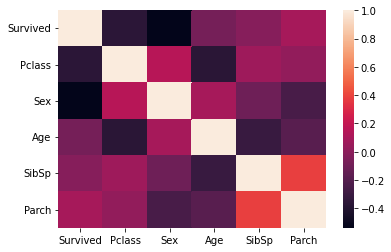

In [ ]:
sns.heatmap(data_train.corr())

In [ ]:
X = data_train[['Pclass',	'Sex',	'Age',	'SibSp',	'Parch']].values
y = data_train[['Survived']]


mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape, y_train.shape

((499, 5), (499,))

## Arvore de Decisão

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.2024
Eout: 0.2000
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       139
           1       0.84      0.54      0.66        76

    accuracy                           0.80       215
   macro avg       0.81      0.74      0.76       215
weighted avg       0.81      0.80      0.79       215



Pclass:0.20773889758068576
Sex:0.6948738729319532
Age:0.097387229487361
SibSp:0.0
Parch:0.0


<BarContainer object of 5 artists>

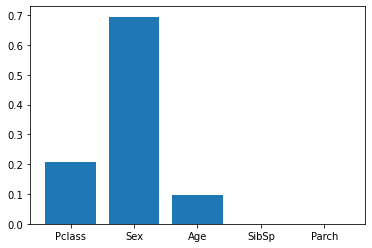

In [ ]:
from matplotlib import pyplot as plt

Features = ['Pclass',	'Sex',	'Age',	'SibSp',	'Parch']
Outcome = ['Survived']

for feature, importance in zip(Features, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(Features, clf.feature_importances_)

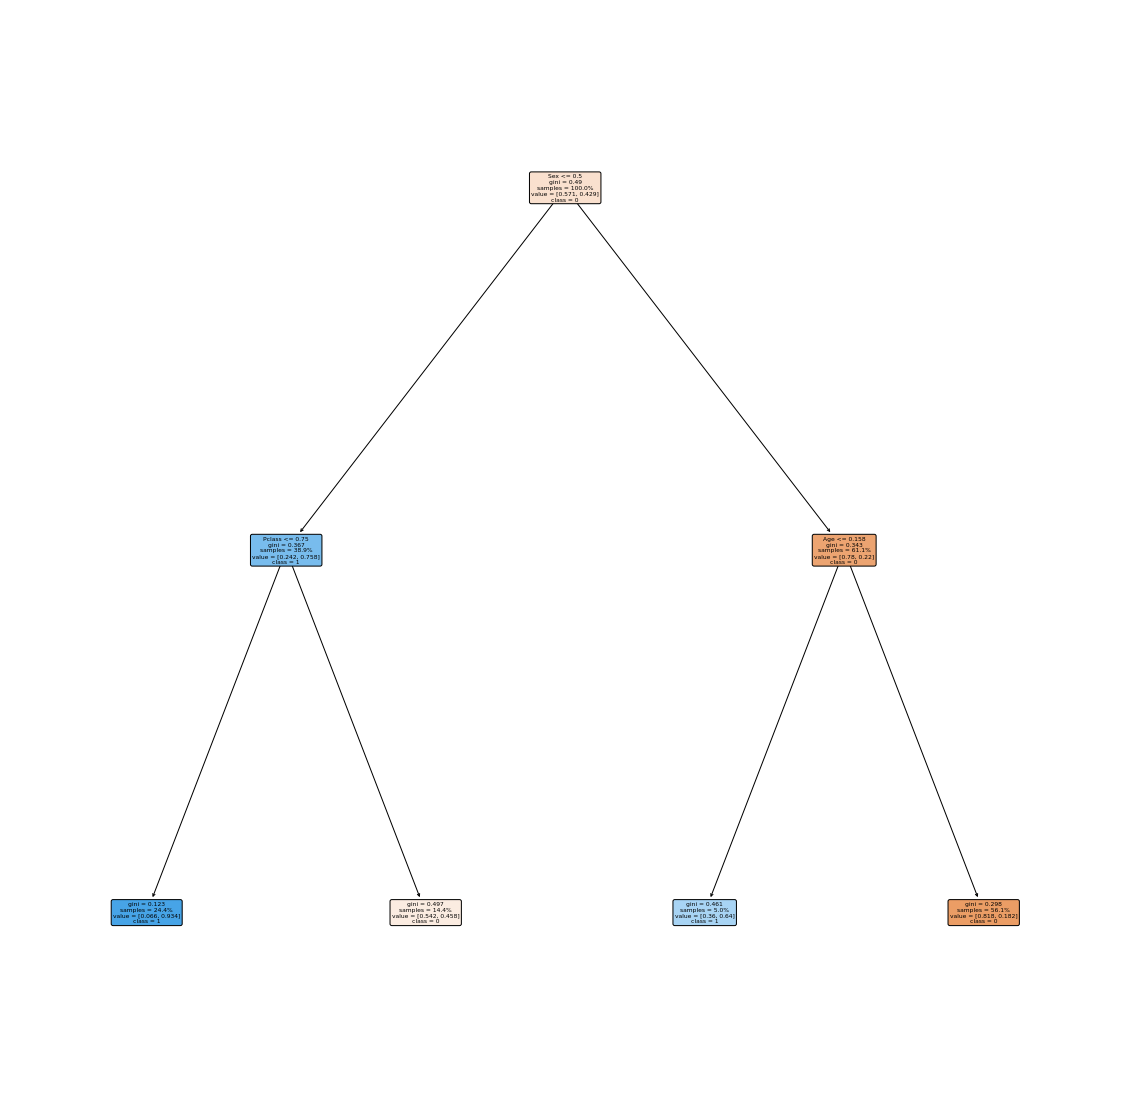

In [ ]:

# feature labels
features_label = data_train[['Pclass',	'Sex',	'Age',	'SibSp',	'Parch']].columns

# class label
class_label = ['0','1']

plt.figure(figsize=(20,20))
plot_tree(
    clf, 
    feature_names = features_label,
    class_names = class_label, 
    filled=True, 
    proportion = True,
    fontsize=6, 
    rounded = True)

plt.savefig('filename.png')

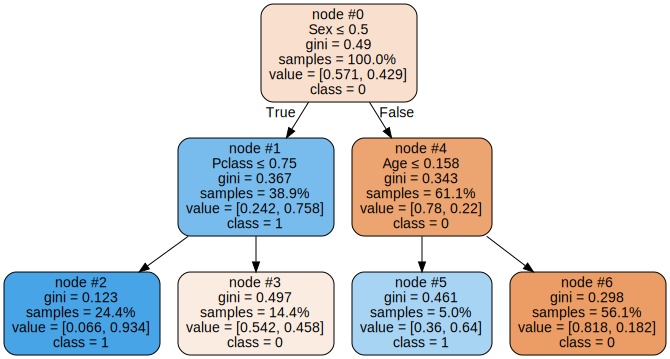

In [ ]:

dot_data = export_graphviz( 
         clf, 
         out_file = None,
         feature_names = features_label,
         class_names = class_label,  
         filled = True, 
         rounded = True,
         proportion = True,
         node_ids = True,
         rotate  =False,
         label = 'all',
         special_characters = True
        )  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X_train, y_train)

    print('Ein: %0.4f' % (1 - accuracy_score(y_train, estimator.predict(X_train))))
    print('Eout: %0.4f' % (1 - accuracy_score(y_test, estimator.predict(X_test))))

    print(classification_report(y_test, estimator.predict(X_test)))
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,8)
   , min_samples_leaf=(1,20))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

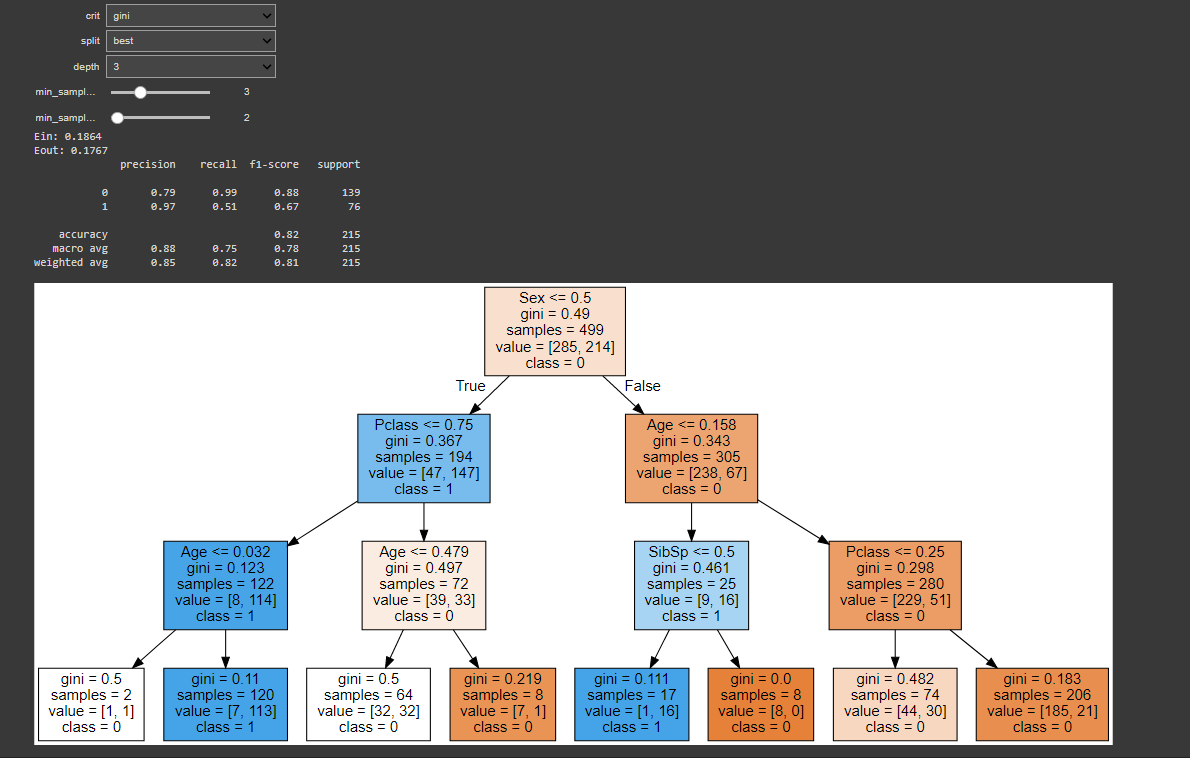

## Rede Neural Keras

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(5)))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', metrics='mean_squared_error', optimizer='sgd')


model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 15)                90        
                                                                 
 dense_28 (Dense)            (None, 15)                240       
                                                                 
 dense_29 (Dense)            (None, 1)                 16        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=70, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 0.2587 - mean_squared_error: 0.2587 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2572 - mean_squared_error: 0.2572 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2556 - mean_squared_error: 0.2556 - val_loss: 0.2619 - val_mean_squared_error: 0.2619
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2542 - mean_squared_error: 0.2542 - val_loss: 0.2604 - val_mean_squared_error: 0.2604
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2528 - mean_squared_error: 0.2528 - val_loss: 0.2588 - val_mean_squared_error: 0.2588
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2514 - mean_squared_error: 0.2514 - val_loss: 0.2573 - val_mean_squared_error: 0.2573
Epoch 7/100
8/8 [============================

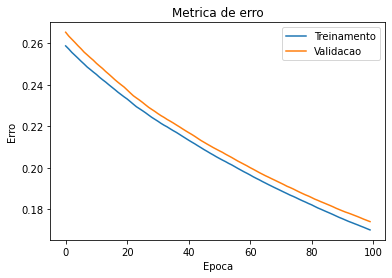

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

In [ ]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test,y_pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       131
           1       0.85      0.60      0.70        84

    accuracy                           0.80       215
   macro avg       0.81      0.76      0.77       215
weighted avg       0.81      0.80      0.79       215

Matriz de Confusão: 

[[122   9]
 [ 34  50]]


# Questão 2

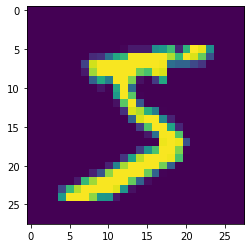

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28)/255.0
X_test = X_test.reshape(X_test.shape[0], 28*28)/255.0

one = OneHotEncoder(sparse=False)

y_train = one.fit_transform(y_train.reshape(-1,1))
y_test = one.fit_transform(y_test.reshape(-1,1))

In [ ]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),


    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                9420      
                                                                 
 dense_19 (Dense)            (None, 12)                156       
                                                                 
 dense_20 (Dense)            (None, 10)                130       
                                                                 
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5046 - accuracy: 0.8471 - val_loss: 0.3143 - val_accuracy: 0.9072
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2888 - accuracy: 0.9173 - val_loss: 0.2610 - val_accuracy: 0.9215
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2495 - accuracy: 0.9285 - val_loss: 0.2353 - val_accuracy: 0.9314
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2257 - accuracy: 0.9348 - val_loss: 0.2253 - val_accuracy: 0.9342
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2099 - accuracy: 0.9399 - val_loss: 0.2245 - val_accuracy: 0.9358
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1983 - accuracy: 0.9424 - val_loss: 0.2112 - val_accuracy: 0.9372
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1891 - accuracy: 0.9438 - val_loss: 0.2149 - val_accuracy:

In [ ]:
# ajustando os shapes
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)


In [ ]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (5,5), padding='same', input_shape=(28,28,1), kernel_initializer="normal", activation='relu', 
                           kernel_regularizer=tf.keras.regularizers.l1(0.01)),
     
     tf.keras.layers.MaxPooling2D((2,2)),
    
     tf.keras.layers.Flatten(),
     
     tf.keras.layers.Dense(30, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(30, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(10, activation='softmax')
])
model_.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
model_.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1960)              0         
                                                                 
 dense_21 (Dense)            (None, 30)                58830     
                                                                 
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 10)                310       
                                                      

In [ ]:
history_ = model_.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4185 - accuracy: 0.9053 - val_loss: 0.2315 - val_accuracy: 0.9525
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2009 - accuracy: 0.9596 - val_loss: 0.1675 - val_accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1579 - accuracy: 0.9681 - val_loss: 0.1431 - val_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1339 - accuracy: 0.9724 - val_loss: 0.1256 - val_accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1184 - accuracy: 0.9749 - val_loss: 0.1112 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1084 - accuracy: 0.9773 - val_loss: 0.1017 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0989 - accuracy: 0.9795 - val_loss: 0.0993 -

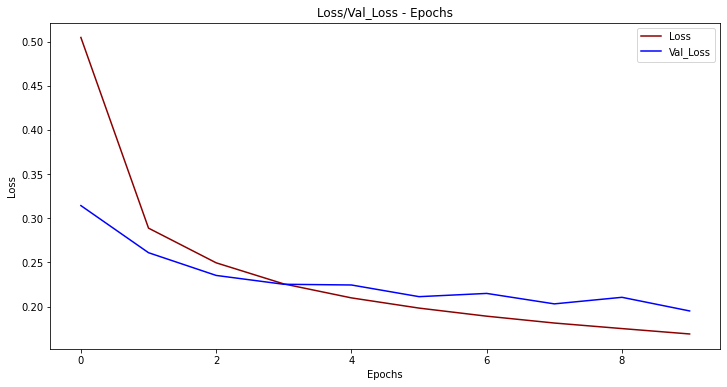

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(fit.history['loss'], color='darkred', label='Loss')
plt.plot(fit.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

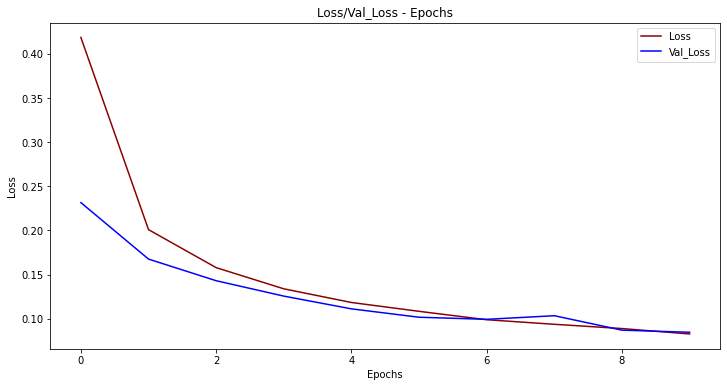

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_.history['loss'], color='darkred', label='Loss')
plt.plot(history_.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model.predict(X_test.reshape(X_test.shape[0],28*28))
y_pred = list(map(lambda x: x.argmax(), y_pred))
y_test_ = list(map(lambda x: x.argmax(), y_test))
print(classification_report(y_test_,np.transpose(y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.92      0.94      1032
           3       0.89      0.95      0.92      1010
           4       0.96      0.95      0.95       982
           5       0.95      0.85      0.90       892
           6       0.94      0.96      0.95       958
           7       0.92      0.97      0.94      1028
           8       0.94      0.92      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
y_pred_ = np.argmax(model_.predict(X_test), axis=1)
y_test_ = np.argmax(y_test, axis=1)

print(classification_report(y_test_,y_pred_, zero_division=True))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
np.argmax(model_.predict(X_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test_

0

In [ ]:
y_pred

7

In [ ]:
X_test[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 109, 255, 253,
        253, 253, 255, 253, 253, 170,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105, 242, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 176,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  

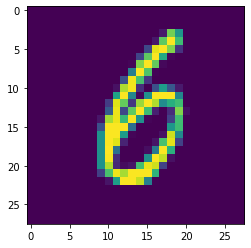

In [ ]:
plt.imshow(X_test[3427])

In [ ]:
model_.predict(X_test[3427].reshape(1,28,28,1)).argmax()

6

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_test[2500].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

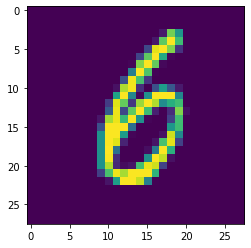

In [ ]:
plt.imshow(X_test[3427])

In [ ]:
model.predict(X_test[3427].reshape(1,28*28)).argmax()

6

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def tratament_images(image):
  raw = np.array(image, dtype = float) / 255.0
  images = raw.reshape([-1, 3, 32, 32]) # transformar em uma matriz pra plotar a imagem
  images = images = images.transpose([0, 2, 3, 1]) # ajeita as colunas pra montar a imagem
  return images


def carregar_data(file):
  data = unpickle(file)
  images_array = data[b'data']
  images = tratament_images(images_array)

  labels = np.array(data[b'labels'])

  return images, labels


def test():
  images_, labels_ = carregar_data(f'/content/drive/MyDrive/cifar-19-python/test_batch')

  return images_, labels_

def train():
  images = np.zeros(shape=[50000, 32, 32, 3], dtype = float)
  labels = np.zeros(shape=[50000], dtype = int)

  ponteiro_final = 0

  for i in range(5):
    images_, labels_ = carregar_data(f'/content/drive/MyDrive/cifar-19-python/data_batch_{i+1}')
    
    final = ponteiro_final + 10000
    images[ponteiro_final:final,:] = images_
    labels[ponteiro_final:final] = labels_

    ponteiro_final = final

  return images, labels



In [4]:
data = unpickle(f'/content/drive/MyDrive/cifar-19-python/batches.meta')
data

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [5]:
name_labels = ['avião','carro','passaro','gato','viado','cachorro','sapo','cavalo','barco','caminhão']

In [6]:
X_train, y_train = train()
X_test, y_test = test()
classe_one_hot_train = np_utils.to_categorical(y_train,10)
classe_one_hot_test = np_utils.to_categorical(y_test,10)

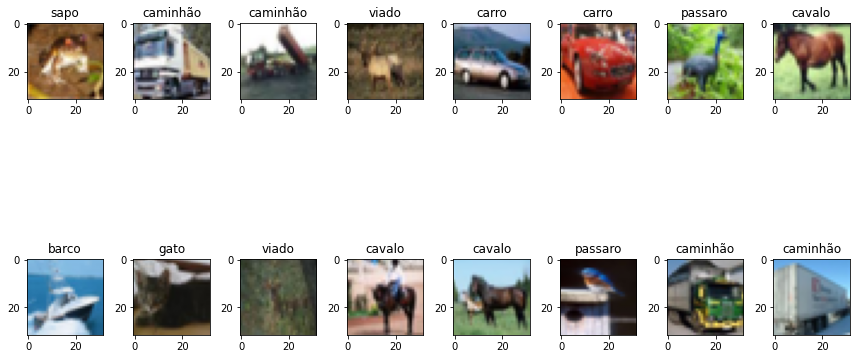

In [ ]:
rows = 2
cols = 8
axes = []
fig = plt.figure(figsize=(12,8))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title = (str(name_labels[y_train[a]]))
    axes[-1].set_title(subplot_title)
    plt.imshow(X_train[a])
    

fig.tight_layout()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), padding='same', input_shape=(32,32,3), activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu', strides=2), 
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(200, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), padding='same', activation='relu', strides=2), 
    tf.keras.layers.Dropout(0.5),
  
    tf.keras.layers.Conv2D(200, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (1,1), padding='valid', activation='relu'), 
    tf.keras.layers.Conv2D(10, (1,1), padding='valid', activation='relu'), 
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 dropout (Dropout)           (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 200)       1

In [8]:
history = model.fit(X_train, classe_one_hot_train, epochs=100, batch_size=128,validation_data=(X_test,classe_one_hot_test))

Epoch 1/100
391/391 [==============================] - 90s 185ms/step - loss: 2.1353 - accuracy: 0.1795 - val_loss: 2.1627 - val_accuracy: 0.1949
Epoch 2/100
391/391 [==============================] - 70s 179ms/step - loss: 1.9356 - accuracy: 0.2398 - val_loss: 1.9282 - val_accuracy: 0.2625
Epoch 3/100
391/391 [==============================] - 70s 179ms/step - loss: 1.8223 - accuracy: 0.2728 - val_loss: 1.7808 - val_accuracy: 0.3080
Epoch 4/100
391/391 [==============================] - 71s 181ms/step - loss: 1.7295 - accuracy: 0.3252 - val_loss: 1.6471 - val_accuracy: 0.3745
Epoch 5/100
391/391 [==============================] - 70s 179ms/step - loss: 1.6238 - accuracy: 0.4026 - val_loss: 1.5557 - val_accuracy: 0.4434
Epoch 6/100
391/391 [==============================] - 70s 179ms/step - loss: 1.5045 - accuracy: 0.4549 - val_loss: 1.4334 - val_accuracy: 0.4867
Epoch 7/100
391/391 [==============================] - 70s 179ms/step - loss: 1.3981 - accuracy: 0.4920 - val_loss: 1.3491 -

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(classe_one_hot_test, axis=1)

print(classification_report(y_test, y_pred))
print('matriz de confusão')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.90      0.93      0.91      1000
           2       0.70      0.78      0.74      1000
           3       0.70      0.55      0.62      1000
           4       0.82      0.69      0.75      1000
           5       0.70      0.75      0.73      1000
           6       0.85      0.83      0.84      1000
           7       0.77      0.89      0.82      1000
           8       0.85      0.93      0.89      1000
           9       0.90      0.89      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

matriz de confusão
[[790  18  58   5  10   3   5  10  74  27]
 [  6 927   1   2   1   3   2   4  16  38]
 [ 51   1 780  28  39  40  29  24   7   1]
 [ 22   7  73 552  29 184  54  48  21  10]
 [  9   1  72  33 693  37  36 104  14   1]
 [  8  

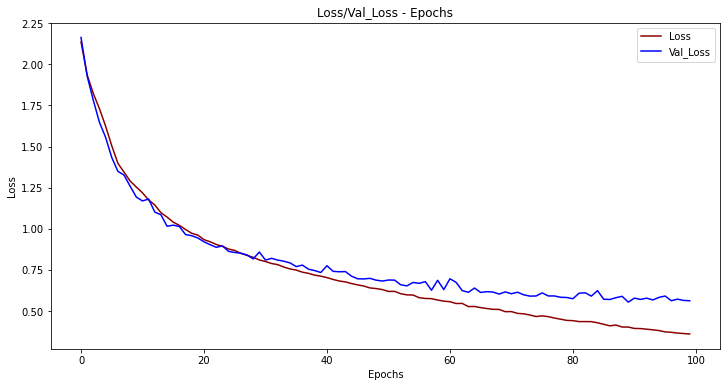

In [9]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, classe_one_hot_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print('Ein: %0.4f' % (1 - loaded_model.evaluate(X_train, classe_one_hot_train, verbose=0)[1]))
print('Eout: %0.4f' % (1 - loaded_model.evaluate(X_test, classe_one_hot_test, verbose=0)[1]))

accuracy: 80.33%
Ein: 0.0943
Eout: 0.1967


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, classe_one_hot_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print('Ein: %0.4f' % (1 - loaded_model.evaluate(X_train, classe_one_hot_train, verbose=0)[1]))
print('Eout: %0.4f' % (1 - loaded_model.evaluate(X_test, classe_one_hot_test, verbose=0)[1]))

accuracy: 80.33%
Ein: 0.0943
Eout: 0.1967
